## Phys 212 Final Project

Jonah Medoff

Due: April 23

Presentation: April 24, 10:40 AM

In [1]:
#import time
import numpy as np
import pandas as pd
import healpy as hp
#import random
#import pickle

#from scipy.optimize import curve_fit
from tqdm.notebook import tqdm

from astropy.io import fits
from astropy import table
from astropy import visualization
from astropy import modeling
from astropy import stats
#from astropy.stats import sigma_clipped_stats
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Download from Planck Legacy Archive
# https://irsa.ipac.caltech.edu/data/Planck/release_3/all-sky-maps/previews/COM_CMB_IQU-smica_2048_R3.00_full/index.html
maps = hp.read_map("COM_CMB_IQU-smica_2048_R3.00_full.fits", field=(0, 5))
# true temp map and impainted temp map
temp_map = maps[0] 

In [3]:
hdu = fits.open("COM_CMB_IQU-smica_2048_R3.00_full.fits")
dat = hdu[1].data
tab = table.Table(dat)
tab

I_STOKES,Q_STOKES,U_STOKES,TMASK,PMASK,I_STOKES_INP,Q_STOKES_INP,U_STOKES_INP,TMASKINP,PMASKINP
float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
1.431792e-05,1.3586341e-06,-3.5971763e-07,0.0,0.0,1.5762355e-06,2.7604574e-06,3.8444896e-06,0.0,0.0
1.4709487e-05,6.260073e-07,-1.5770482e-06,0.0,0.0,-1.2112443e-05,2.370625e-06,3.9189913e-06,0.0,0.0
1.52534885e-05,6.244301e-07,-1.3418501e-06,0.0,0.0,5.4128986e-06,2.8503705e-06,3.8499547e-06,0.0,0.0
1.5607387e-05,-9.849808e-07,8.9587525e-07,0.0,0.0,-7.649248e-06,2.4532628e-06,3.941349e-06,0.0,0.0
1.46945085e-05,6.825214e-07,1.18767254e-07,0.0,0.0,-2.8255468e-05,1.9594954e-06,3.936757e-06,0.0,0.0
1.6811511e-05,1.5900221e-07,8.0198737e-07,0.0,0.0,-4.2609e-05,1.535833e-06,3.8996127e-06,0.0,0.0
1.4993511e-05,-9.4396967e-07,1.3107569e-06,0.0,0.0,-2.3984438e-05,2.0351542e-06,3.974803e-06,0.0,0.0
1.738686e-05,-8.491685e-07,3.048783e-07,0.0,0.0,-3.8622613e-05,1.6051129e-06,3.951931e-06,0.0,0.0
1.3398185e-05,-1.6563552e-06,-8.5616807e-07,0.0,0.0,1.3743952e-05,2.88364e-06,3.8029045e-06,0.0,0.0


In [4]:
#hdu[1].header

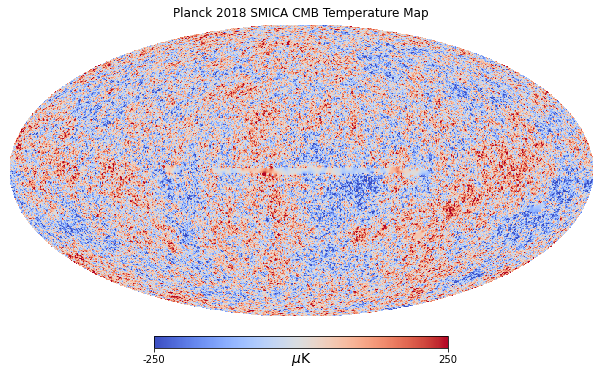

In [5]:
hp.mollview(temp_map*1e6, title="Planck 2018 SMICA CMB Temperature Map", unit=f"$\mu$K", cmap="coolwarm", 
            min=-250, max=250)
plt.show()

In [6]:
temp_map

array([-1.2349988e-04, -9.2796152e-05, -6.3961874e-05, ...,
        1.0377157e-04,  8.6182328e-05,  8.6515050e-05], dtype=float32)

### CMB Power Spectrum

Mathematically, this is how you'd compute $C_\ell^{TT}$:

$\frac{\Delta T}{T}(\theta, \phi) = \sum_{\ell,m} a_{\ell,m}Y_{\ell,m}(\theta, \phi)$ (get this from the temperature map)

$a_{\ell,m}=\int \frac{\Delta T}{T}Y^*_{\ell,m}d\Omega$

$C_\ell^{TT} = \frac{1}{2\ell+1}\sum_{m}|a_{\ell,m}|^2$

Multiply $C_\ell^{TT}$ by $\frac{\ell(\ell+1)}{2\pi}$ to get the dimensionless power spectrum

healpy has built-in functions to do all of this, so I'll just use those

In [7]:
# Calculate the a_lm's
alm = hp.map2alm(temp_map*1e6, lmax=2500) 
# Multiply by 1e6 so that the units are in muK
# lmax=2500 seems reasonable

#from scipy.special import sph_harm
#for l, m in zip():
#   alm = np.quad(temp_map*sph_harm(m, l))

# Calculate the cl_tt's
cl_tt = hp.alm2cl(alm)
#cl_tt = 1/(2*ells+1)*np.sum(np.abs(alm[])**2)

# make it dimensionless
ells = np.arange(len(cl_tt))
dl_tt = ells*(ells + 1)/(2*np.pi)*cl_tt
dl_tt

array([0.00000000e+00, 4.41515084e-12, 2.00976244e+02, ...,
       2.25689301e+02, 2.19055953e+02, 2.24286257e+02])

In [8]:
from scipy.ndimage import gaussian_filter1d
dl_tt_smooth = gaussian_filter1d(dl_tt, sigma=5)

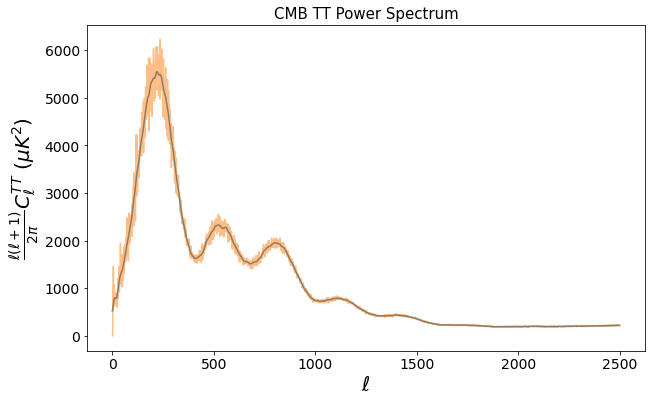

In [9]:
plt.figure(figsize=(10,6))
plt.plot(ells, dl_tt_smooth)
plt.plot(ells, dl_tt, alpha=0.5)
plt.xlabel(r'$\ell$', fontsize=20)
plt.ylabel(r'$\frac{\ell(\ell+1)}{2\pi} C_\ell^{TT}$ ($\mu K^2$)', fontsize=20)
plt.title("CMB TT Power Spectrum", fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

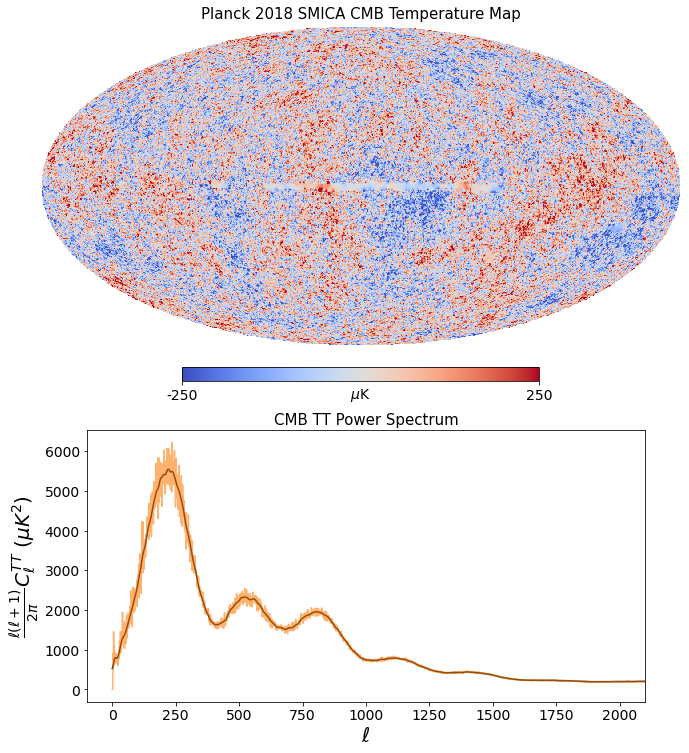

In [10]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(10, 11))

#ax1 = plt.subplot(2, 1, 1)
hp.mollview(temp_map * 1e6, title="Planck 2018 SMICA CMB Temperature Map", unit=r"$\mu$K", 
            cmap="coolwarm", min=-250, max=250, sub=(2, 1, 1))
plt.gca().title.set_fontsize(15)
cb = plt.gcf().axes[-1]
cb.tick_params(labelsize=14)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(ells, dl_tt_smooth, c='k')
ax2.plot(ells, dl_tt, alpha=0.6, c='tab:orange')
ax2.set_xlabel(r'$\ell$', fontsize=20)
ax2.set_ylabel(r'$\frac{\ell(\ell+1)}{2\pi} C_\ell^{TT}$ ($\mu K^2$)', fontsize=20)
ax2.set_title("CMB TT Power Spectrum", fontsize=15)
ax2.set_xlim(-100, 2100)
ax2.tick_params(labelsize=14)
#ax2.legend(prop={'size':12})

#plt.tight_layout()
#plt.savefig('cmb_map_powerspec.pdf', bbox_inches='tight', dpi=300)
plt.show()

## MCMC likelihood analysis

### Forward model (CAMB)

In [11]:
# Forward model
import camb

# parameters info: https://camb.readthedocs.io/en/latest/model.html

# Just the 6 parameters:
params = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, tau=0.06,  
                         As=2e-9, ns=0.965, halofit_version='mead', lmax=2500)
# Or I can include a few others like neutrino mass and Omega_curvature
#params = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
#                         As=2e-9, ns=0.965, halofit_version='mead', lmax=2500)

results = camb.get_results(params)

In [12]:
powerspec = results.get_cmb_power_spectra(params, CMB_unit='muK')
"""
powerspec components:
'total': default, fully lensed scalar + tensor CMB power spectrum (USE THIS ONE)
'unlensed_scalar': scalar power spectrum without lensing
'unlensed_total': scalar + tensor power spectrum without lensing
'lensed_scalar': scalar power spectrum with lensing
'tensor': tensor power spectrum

Each component has 4 columns:
0: TT (USE THIS ONE)
1: EE
2: BB
3: TE
"""
powerspec

{'total': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 9.71256393e+02,  3.19837711e-02,  1.56219137e-06,
          2.60301415e+00],
        ...,
        [ 6.29772022e+01,  2.73228518e+00,  2.10305191e-02,
         -3.52676833e+00],
        [ 6.28610474e+01,  2.72991991e+00,  2.10019683e-02,
         -3.54407489e+00],
        [ 6.27463598e+01,  2.72739544e+00,  2.09734910e-02,
         -3.56127357e+00]]),
 'unlensed_scalar': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 9.71253444e+02,  3.19822089e-02,  0.00000000e+00,
          2.60301417e+00],
        ...,
        [ 5.67203244e+01,  2.97914377e+00,  0.00000000e+00,
         -3.44494214e+00],
        [ 5.66249237e+01,  2.97835370e+00,  0.00000000e+00,
         -3.48

(2551, 4)


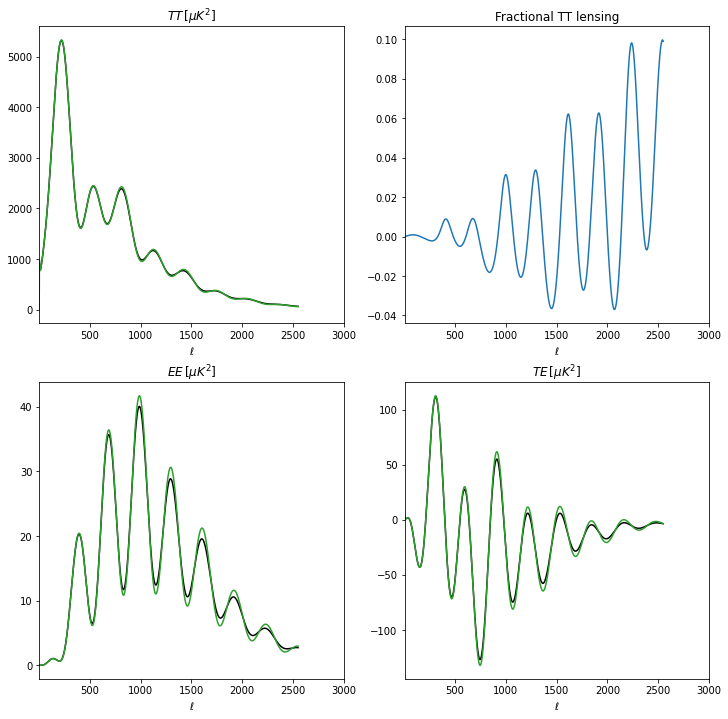

In [13]:
# This code cell comes from https://camb.readthedocs.io/en/latest/CAMBdemo.html

totCL=powerspec['total']
unlensedCL=powerspec['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,2, figsize = (12,12))

ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='C2')
ax[0,0].set_title(r'$TT\, [\mu K^2]$')

ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0])
ax[0,1].set_title(r'Fractional TT lensing')

ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='C2')
ax[1,0].set_title(r'$EE\, [\mu K^2]$')

ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='C2')
ax[1,1].set_title(r'$TE\, [\mu K^2]$')

for ax in ax.reshape(-1): 
    ax.set_xlim([2,3000])
    ax.set_xlabel(r'$\ell$')

In [14]:
def theory_cl_tt(theta):
    ombh2, omch2, H0, ns, As, tau = theta
    
    params = camb.set_params(H0=H0, ombh2=ombh2, omch2=omch2, tau=tau,  
                             As=As, ns=ns, halofit_version='mead', lmax=2500)
    results = camb.get_results(params)
    powerspec = results.get_cmb_power_spectra(params, CMB_unit='muK')
    theory_cl_tt = powerspec['total'][:,0]
    
    # This output is dimensionless, so I need to add back the dimension
    ells = np.arange(len(theory_cl_tt))
    theory_cl_tt = np.divide(theory_cl_tt*(2*np.pi), ells*(ells+1), 
                      out=np.zeros_like(theory_cl_tt), where=ells != 0)
    return theory_cl_tt

In [15]:
theory_cl_tt([0.022, 0.122, 67.5, 0.965, 2e-9, 0.06])

array([0.00000000e+00, 0.00000000e+00, 1.01709732e+03, ...,
       6.09247803e-05, 6.07647150e-05, 6.06062991e-05])

### Prior and likelihood functions

Likelihood:

$L(\theta) = \prod_{\ell = \ell_{\min}}^{\ell_{\max}} \frac{1}{\sqrt{2\pi \sigma_\ell^2}} \exp\left( -\frac{\left(C_\ell^{obs} - C_\ell^{th}(\theta)\right)^2}{2\sigma_\ell^2} \right)$

$\log L(\theta) = -\frac{1}{2} \sum_{\ell}(\frac{(C_{\ell}^{obs}-C_{\ell}^{th}(\theta))^2}{\sigma_{\ell}^2} + \log(2\pi\sigma_{\ell}^2))$

The constant term in the log likelihood shouldn't make a difference for Metropolis-Hastings MCMC, so I could use this instead:

$\log L(\theta) = -\frac{1}{2} \sum_{\ell}(\frac{C_{\ell}^{obs}-C_{\ell}^{th}(\theta)}{\sigma_{\ell}})^2$

In [16]:
# Uniform prior:
# (except tau, which is Gaussian)

#params = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, tau=0.06,  
#                         As=2e-9, ns=0.965, halofit_version='mead', lmax=2500)

from scipy.stats import norm

def log_prior(theta, tau_correction = False):
    ombh2, omch2, H0, ns, As, tau = theta
    
    # Play around with these bounds
    if not (0.01 < ombh2 < 0.04): return -np.inf
    if not (0.05 < omch2 < 0.2): return -np.inf
    if not (50 < H0 < 90): return -np.inf
    if not (0.01 < tau < 0.15): return -np.inf
    if not (0.9 < ns < 1.1): return -np.inf
    if not (1e-9 < As < 3e-9): return -np.inf
    
    if tau_correction:
        # These are the values determined by the Planck low-l E-mode polarization data
        tau_mean = 0.054
        tau_sigma = 0.007
        log_prior_tau = norm.logpdf(tau, loc=tau_mean, scale=tau_sigma)
        return log_prior_tau

    return 0.0  # log(1) for uniform priors

# Gaussian likelihood

def log_likelihood(theta, ells, cl_tt_obs, sigma_l):
    ombh2, omch2, H0, ns, As, tau = theta
    
    cl_tt_theory = theory_cl_tt([ombh2, omch2, H0, ns, As, tau])
    cl_tt_theory_interp = np.interp(ells, np.arange(len(cl_tt_theory)), cl_tt_theory)
    
    chi2 = np.sum(((cl_tt_obs - cl_tt_theory_interp)/sigma_l)**2 + np.log(2*np.pi*sigma_l**2))

    return -0.5 * chi2

# posterior = prior*likelihood
# log(posterior) = log(prior) + log(likelihood)

def log_posterior(theta, ells, cl_tt_obs, sigma_l, tau_correction = False):
    lp = log_prior(theta, tau_correction = tau_correction)
    
    if not np.isfinite(lp):
        return -np.inf
    
    return lp + log_likelihood(theta, ells, cl_tt_obs, sigma_l)

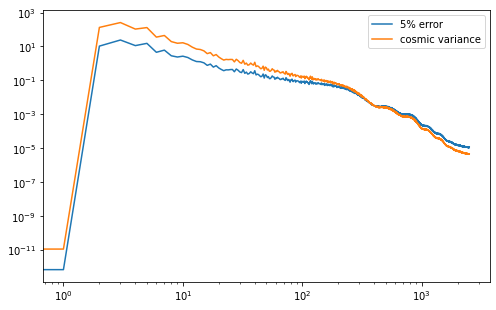

In [17]:
# sigma_l is the standard deviation/uncertainty at each l in Cl_TT

# I can either make a naive estimate and use
sigma_l = 0.05 * cl_tt
sigma_l[0]=sigma_l[1]

# or define sigma_l as sqrt(cosmic variance)
sigma_lcv = np.sqrt(2/(2*ells+1)) * cl_tt
sigma_lcv[0]=sigma_lcv[1]

plt.figure(figsize=(8,5))
plt.loglog(ells, sigma_l, label='5% error')
plt.loglog(ells, sigma_lcv, label='cosmic variance')
plt.legend()
plt.show()

### MCMC algorithm

In [18]:
def planck_mcmc(theta_current, ells, cl_tt_obs, sigma_l, Nsteps=1000, gaussian_std=[1,1,1,1,1,1]):
    """
    Run Metropolis-Hastings MCMC for Planck parameter estimation
    
    Parameters:
        theta_current: Initial parameter values (array-like)
        ells: Multipole moments
        cl_tt_obs: Observed C_ell^TT
        sigma_l: Uncertainty per ell
        Nsteps: Number of MCMC steps
        gaussian_std: Proposal standard deviation (scalar or array-like)
    
    Returns:
        chain: Array of shape (n_params, Nsteps)
    """
    chain = np.zeros((len(theta_current), Nsteps))
    log_post_current = log_posterior(theta_current, ells, cl_tt_obs, sigma_l, tau_correction = True)
    chain[:,0] = theta_current
    
    print(log_post_current); print()
    accept_count = 0
    count = 0
    
    for step in tqdm(range(1, Nsteps)):
        # Propose new parameters and calculate corresponding acceptance ratio
        theta_new = theta_current + np.random.normal(0,gaussian_std)
        log_post_new = log_posterior(theta_new, ells, cl_tt_obs, sigma_l, tau_correction = True)
        # Metropolis-Hastings uses an acceptance ratio of the form
        # accept_ratio = min(1, posterior(theta_new)/posterior(theta_current))
        log_accept_ratio = log_post_new - log_post_current
        if count % 200 == 0:
            print(log_post_new)
        count += 1
        
        # Accept proposed theta
        if np.log(np.random.uniform(0,1)) < log_accept_ratio:
            theta_current = theta_new
            log_post_current = log_post_new
            accept_count += 1
        
        chain[:,step] = theta_current
    
    print("Acceptance rate:", accept_count / Nsteps) # Should be roughly between 15-60%
    return chain

In [41]:
# Fiducial values:
ombh2 = 0.0224; omch2 = 0.12; H0 = 67.4
ns = 0.965; As = 2.1e-9; tau = 0.054
#ombh2 = 0.02; omch2 = 0.1; H0 = 70
#ns = 0.97; As = 2.1e-9; tau = 0.07
theta_current = [ombh2, omch2, H0, ns, As, tau]

# Gaussian_std (i.e., max step size), should be ~0.01 * theta_current
gaussian_std = [i*0.01 for i in theta_current]
#gaussian_std = np.array([0.001, 0.003, 0.5, 0.005, 0.2e-9, 0.005])

# Nsteps should probably be at least 2000; maybe closer to 4000-5000
Nsteps = 4000

# For some reason, using dl_tt_smooth does not give good results
#chain = planck_mcmc(theta_current, ells, dl_tt_smooth, sigma_l, gaussian_std=gaussian_std)
chain = planck_mcmc(theta_current, ells, cl_tt, sigma_l, gaussian_std=gaussian_std, Nsteps=Nsteps)

-128052.81650828138



  0%|          | 0/3999 [00:00<?, ?it/s]

-128180.79320841836
-56602.61817301139
-55958.61620996489
-54846.67949130344
-54340.677541187906
-54618.700228133945
-inf
-inf
-inf
-54196.65736014388
-54620.083538703366
-inf
-54274.43271688328
-54359.59583990894
-inf
-inf
-54131.50105467415
-inf
-54103.26883455788
-inf
Acceptance rate: 0.03525


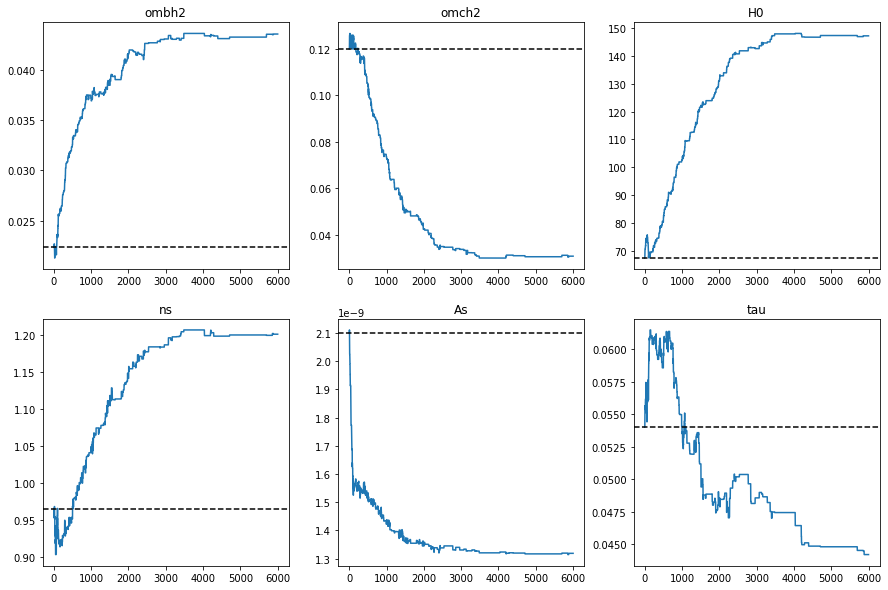

In [22]:
chain = np.load('planck_mcmc_chain_f16.npy')
fig, ax = plt.subplots(2,3,figsize=(15,10))
ax[0,0].plot(np.arange(1,len(chain[0])+1), chain[0])
ax[0,0].axhline(y=0.0224, c='k', ls='--')
ax[0,0].set_title('ombh2')
ax[0,1].plot(np.arange(1,len(chain[1])+1), chain[1])
ax[0,1].axhline(y=0.12, c='k', ls='--')
ax[0,1].set_title('omch2')
ax[0,2].plot(np.arange(1,len(chain[2])+1), chain[2])
ax[0,2].axhline(y=67.4, c='k', ls='--')
ax[0,2].set_title('H0')
ax[1,0].plot(np.arange(1,len(chain[3])+1), chain[3])
ax[1,0].axhline(y=0.965, c='k', ls='--')
ax[1,0].set_title('ns')
ax[1,1].plot(np.arange(1,len(chain[4])+1), chain[4])
ax[1,1].axhline(y=2.1e-9, c='k', ls='--')
ax[1,1].set_title('As')
ax[1,2].plot(np.arange(1,len(chain[5])+1), chain[5])
ax[1,2].axhline(y=0.054, c='k', ls='--')
ax[1,2].set_title('tau')
plt.show()

In [19]:
#np.save('planck_mcmc_chain4.npy', chain)
chain1 = np.load('planck_mcmc_chain_f1.npy')
chain2 = np.load('planck_mcmc_chain_f2.npy')
chain3 = np.load('planck_mcmc_chain_f3.npy')
chain4 = np.load('planck_mcmc_chain_f4.npy')
chain5 = np.load('planck_mcmc_chain_f5.npy')
chain6 = np.load('planck_mcmc_chain_f6.npy')
chain7 = np.load('planck_mcmc_chain_f7.npy')
chain8 = np.load('planck_mcmc_chain_f8.npy')
chain9 = np.load('planck_mcmc_chain_f9.npy')
chain10 = np.load('planck_mcmc_chain_f10.npy')
chain11 = np.load('planck_mcmc_chain_f11.npy')
#chain12 = np.load('planck_mcmc_chain_f12.npy')

### Summary statistics

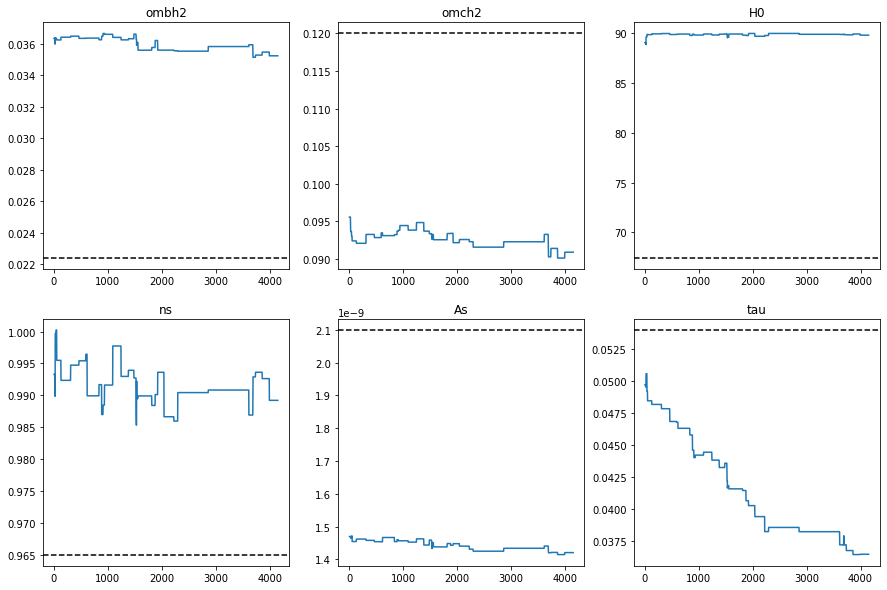

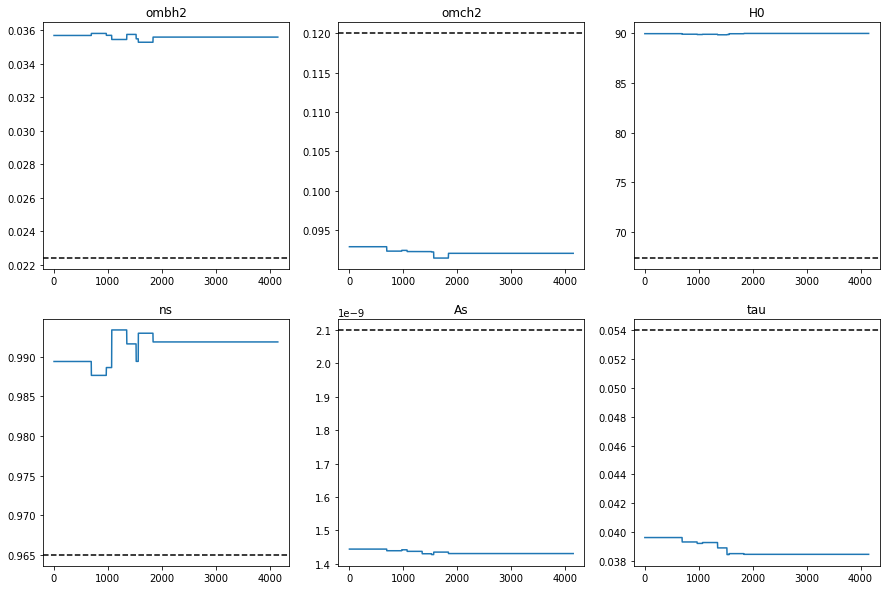

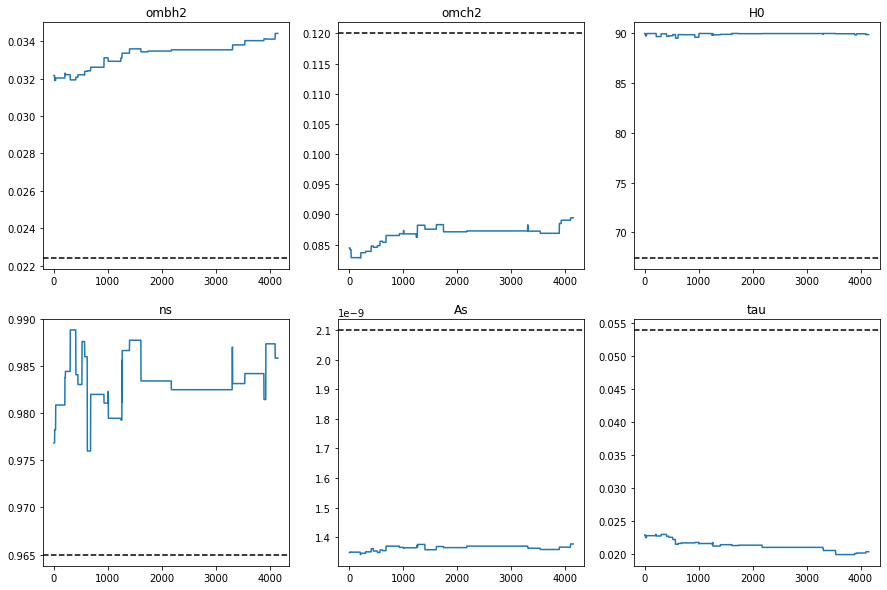

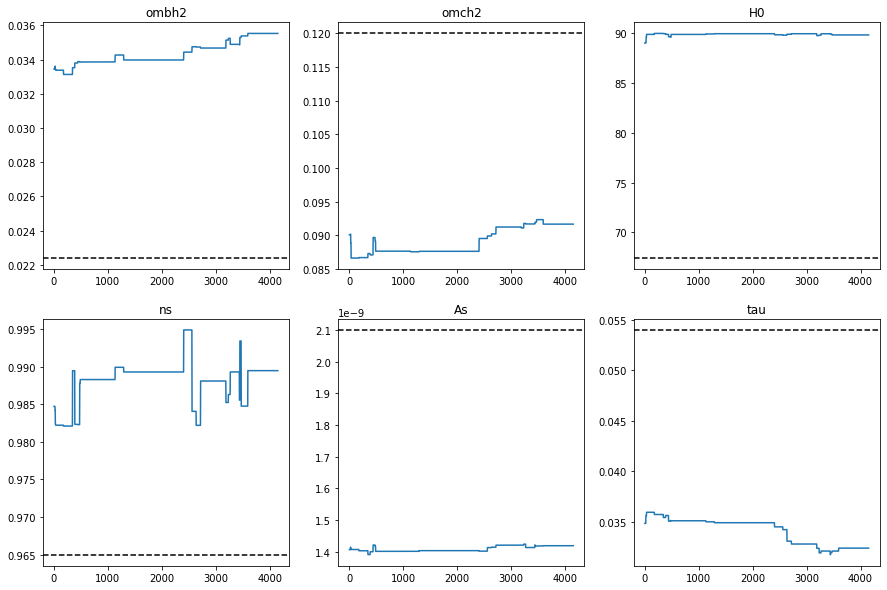

In [20]:
# I just estimated the burnin values by eye
burnins = [850, 850, 850, 850, 850, 850]
for i in range(4):
    chain = np.load(f'planck_mcmc_chain_f{i+1}.npy')
    fig, ax = plt.subplots(2,3,figsize=(15,10))
    ax[0,0].plot(np.arange(1,len(chain[0][burnins[0]:])+1), chain[0][burnins[0]:])
    ax[0,0].axhline(y=0.0224, c='k', ls='--')
    ax[0,0].set_title('ombh2')
    ax[0,1].plot(np.arange(1,len(chain[1][burnins[1]:])+1), chain[1][burnins[1]:])
    ax[0,1].axhline(y=0.12, c='k', ls='--')
    ax[0,1].set_title('omch2')
    ax[0,2].plot(np.arange(1,len(chain[2][burnins[2]:])+1), chain[2][burnins[2]:])
    ax[0,2].axhline(y=67.4, c='k', ls='--')
    ax[0,2].set_title('H0')
    ax[1,0].plot(np.arange(1,len(chain[3][burnins[3]:])+1), chain[3][burnins[3]:])
    ax[1,0].axhline(y=0.965, c='k', ls='--')
    ax[1,0].set_title('ns')
    ax[1,1].plot(np.arange(1,len(chain[4][burnins[4]:])+1), chain[4][burnins[4]:])
    ax[1,1].axhline(y=2.1e-9, c='k', ls='--')
    ax[1,1].set_title('As')
    ax[1,2].plot(np.arange(1,len(chain[5][burnins[5]:])+1), chain[5][burnins[5]:])
    ax[1,2].axhline(y=0.054, c='k', ls='--')
    ax[1,2].set_title('tau')
    plt.show()

In [21]:
burnins = [850, 850, 850, 850, 850, 850]
param_names = ['ombh2', 'omch2', 'H0', 'ns', 'As', 'tau']
fiducials = [0.0224, 0.120, 67.4, 0.965, 2.1e-9, 0.054] # from Planck 2018 results paper

means = []
CI68_lowers = []
CI68_uppers = []
CI95_lowers = []
CI95_uppers = []

for i in range(6):
    main_chain = chain[i][burnins[i]:]
    print(f'{param_names[i]} (fiducial: {fiducials[i]}):')
    print(f'mean: {np.mean(main_chain):.4}')
    means.append(np.mean(main_chain))
    print(f'median: {np.median(main_chain):.4}')
    print(f'St. Dev.: {np.std(main_chain):.4}')
    print(f'68.3% CI: {np.percentile(main_chain, 15.85):.4} – {np.percentile(main_chain, 84.15):.4}')
    CI68_lowers.append(np.percentile(main_chain, 15.85))
    CI68_uppers.append(np.percentile(main_chain, 84.15))
    print(f'95.4% CI: {np.percentile(main_chain, 2.3):.4} – {np.percentile(main_chain, 97.7):.4}')
    CI95_lowers.append(np.percentile(main_chain, 2.3))
    CI95_uppers.append(np.percentile(main_chain, 97.7))
    print()

ombh2 (fiducial: 0.0224):
mean: 0.03436
median: 0.03398
St. Dev.: 0.0006739
68.3% CI: 0.03387 – 0.03539
95.4% CI: 0.03314 – 0.03553

omch2 (fiducial: 0.12):
mean: 0.08912
median: 0.08766
St. Dev.: 0.001933
68.3% CI: 0.08764 – 0.09168
95.4% CI: 0.08664 – 0.09234

H0 (fiducial: 67.4):
mean: 89.91
median: 89.94
St. Dev.: 0.09006
68.3% CI: 89.84 – 89.97
95.4% CI: 89.78 – 89.99

ns (fiducial: 0.965):
mean: 0.9881
median: 0.9893
St. Dev.: 0.002772
68.3% CI: 0.9847 – 0.9895
95.4% CI: 0.9821 – 0.9949

As (fiducial: 2.1e-09):
mean: 1.408e-09
median: 1.403e-09
St. Dev.: 8.16e-12
68.3% CI: 1.401e-09 – 1.418e-09
95.4% CI: 1.4e-09 – 1.42e-09

tau (fiducial: 0.054):
mean: 0.0341
median: 0.0349
St. Dev.: 0.001288
68.3% CI: 0.03238 – 0.03509
95.4% CI: 0.03209 – 0.03593



### Gelman-Rubin statistic

In [22]:
def gelman_rubin(chains):
    # chains.shape == (n_chains, n_params, n_samples)
    m, p, n = chains.shape
    #print(chains[:, :, 0])
    r_hat = np.zeros(p)

    for i in range(p):
        chain_means = np.mean(chains[:, i, :], axis=1)
        #print(chain_means)
        overall_mean = np.mean(chain_means)

        B = n / (m - 1) * np.sum((chain_means - overall_mean) ** 2)
        W = np.mean(np.var(chains[:, i, :], axis=1, ddof=1))

        V_hat = (n - 1) / n * W + B / n
        R_hat = np.sqrt(V_hat / W)

        r_hat[i] = R_hat

    return r_hat

In [23]:
#"""
chain1 = np.load('planck_mcmc_chain_f1.npy')
chain2 = np.load('planck_mcmc_chain_f2.npy')
chain3 = np.load('planck_mcmc_chain_f3.npy')
chain4 = np.load('planck_mcmc_chain_f4.npy')
chain5 = np.load('planck_mcmc_chain_f5.npy')
chain6 = np.load('planck_mcmc_chain_f6.npy')
chain7 = np.load('planck_mcmc_chain_f7.npy')
chain8 = np.load('planck_mcmc_chain_f8.npy')
chain9 = np.load('planck_mcmc_chain_f9.npy')
chain10 = np.load('planck_mcmc_chain_f10.npy')
chain11 = np.load('planck_mcmc_chain_f11.npy')
#"""

In [24]:
#chains = np.stack([chain1, chain2, chain3, chain4, chain5, chain6, chain7,
#                   chain8, chain9, chain10, chain11], axis=0)
chains = np.stack([chain1, chain2, chain4, chain5, chain6,
                   chain9, chain10], axis=0)
#chains = np.stack([chain1, chain2, chain3, chain4], axis=0)
chains.shape

(7, 6, 5000)

In [25]:
for i in range(6):
    print(f'{gelman_rubin(chains)[i]:.4}')

1.087
1.06
1.028
1.043
1.01
1.454


### Probability distribution functions

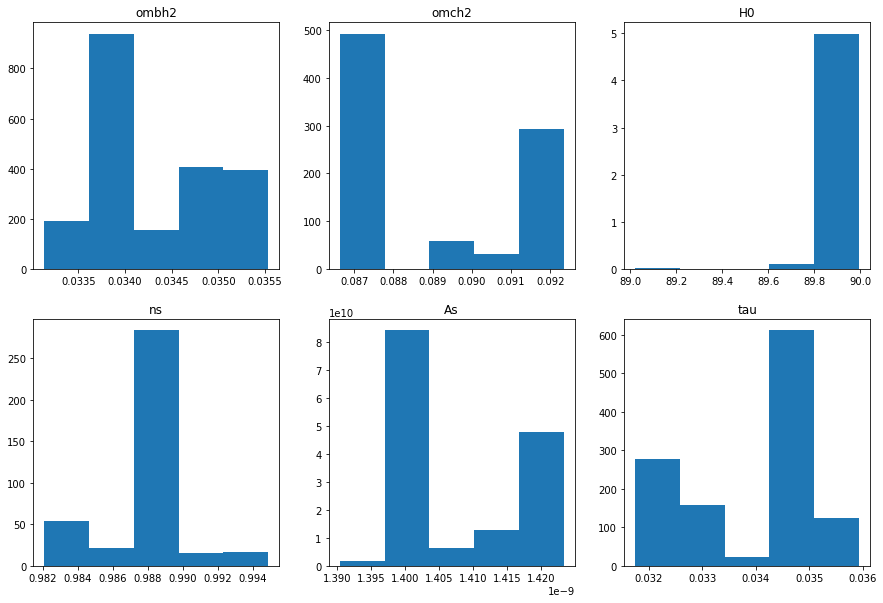

In [26]:
burnins = [850, 850, 850, 850, 850, 850]
fig, ax = plt.subplots(2,3,figsize=(15,10))
ax[0,0].hist(chain[0][burnins[0]:], bins=5, density=True)
ax[0,0].set_title('ombh2')
ax[0,1].hist(chain[1][burnins[1]:], bins=5, density=True)
ax[0,1].set_title('omch2')
ax[0,2].hist(chain[2][burnins[2]:], bins=5, density=True)
ax[0,2].set_title('H0')
ax[1,0].hist(chain[3][burnins[3]:], bins=5, density=True)
ax[1,0].set_title('ns')
ax[1,1].hist(chain[4][burnins[4]:], bins=5, density=True)
ax[1,1].set_title('As')
ax[1,2].hist(chain[5][burnins[5]:], bins=5, density=True)
ax[1,2].set_title('tau')
plt.show()

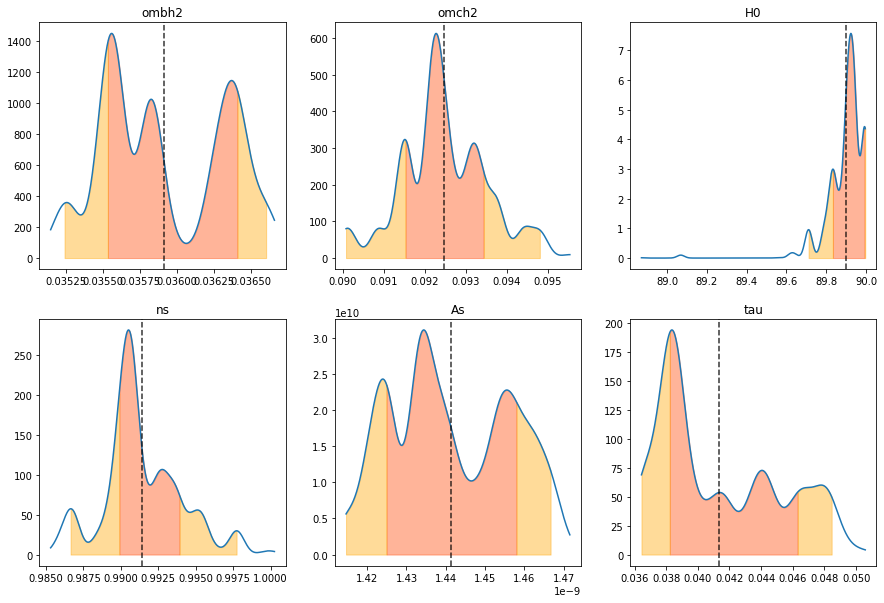

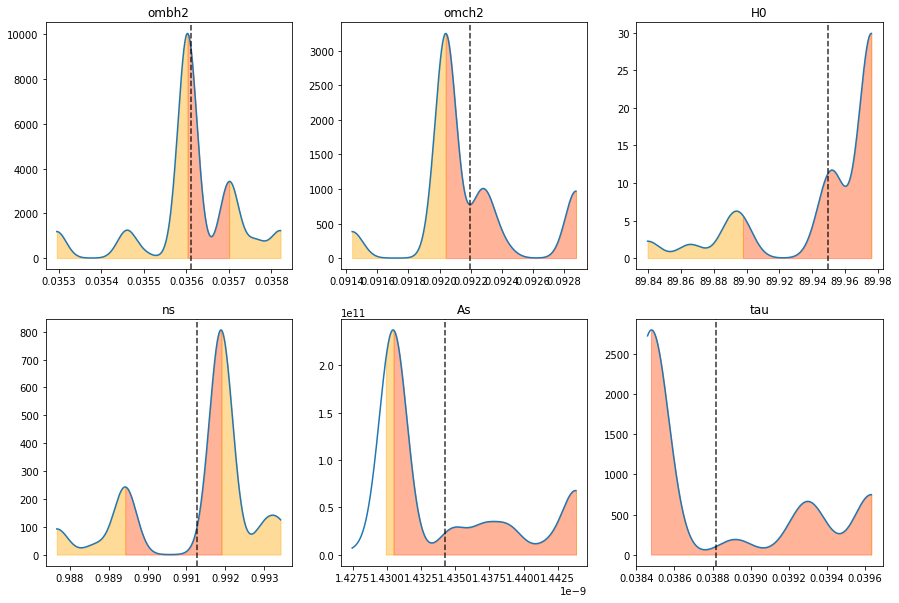

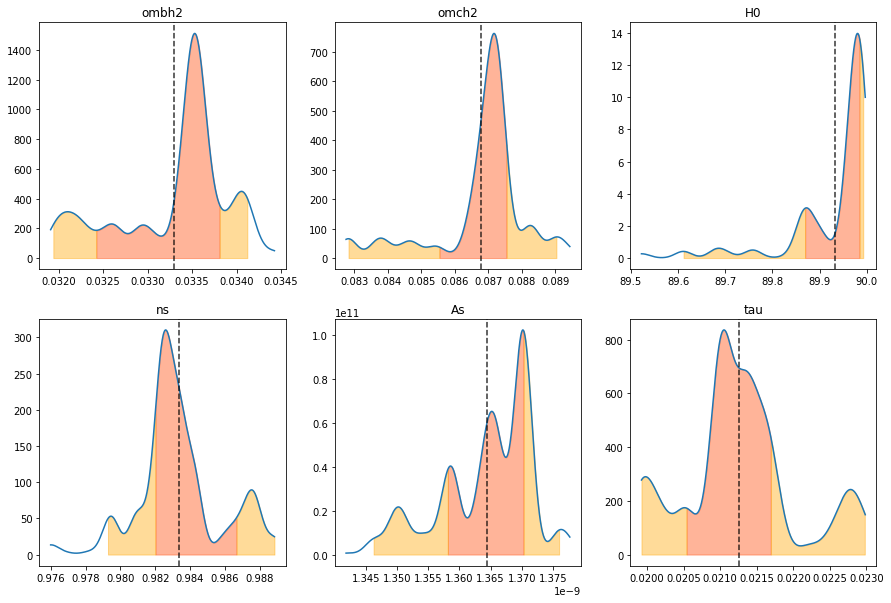

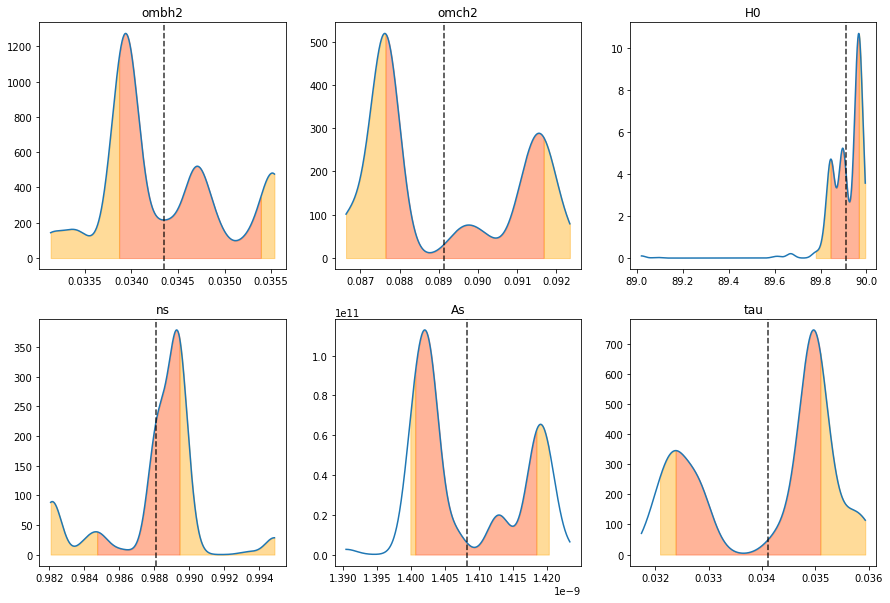

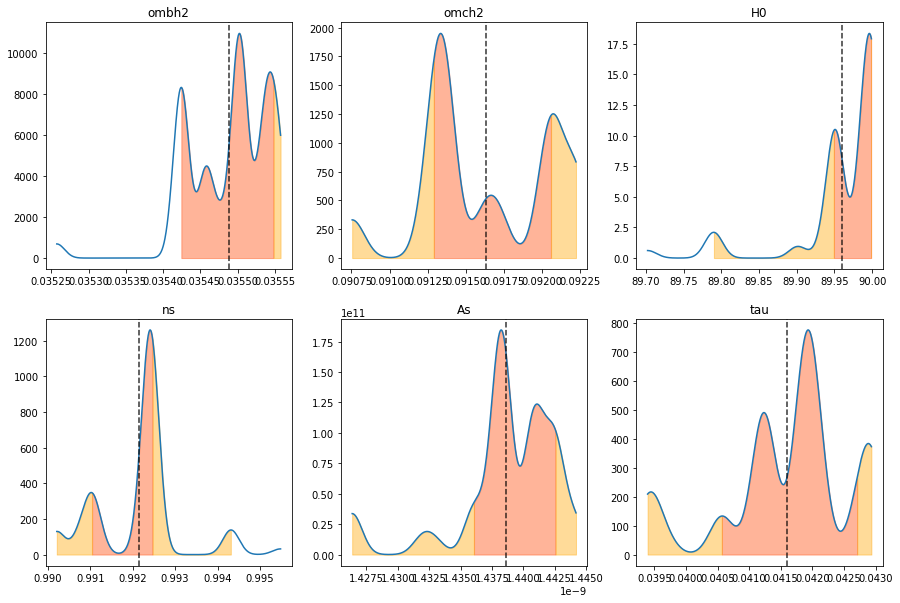

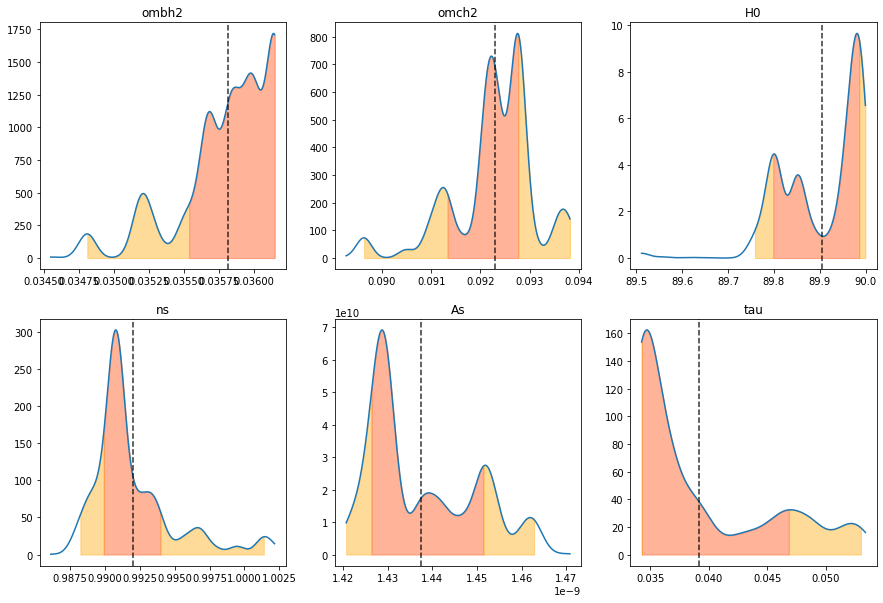

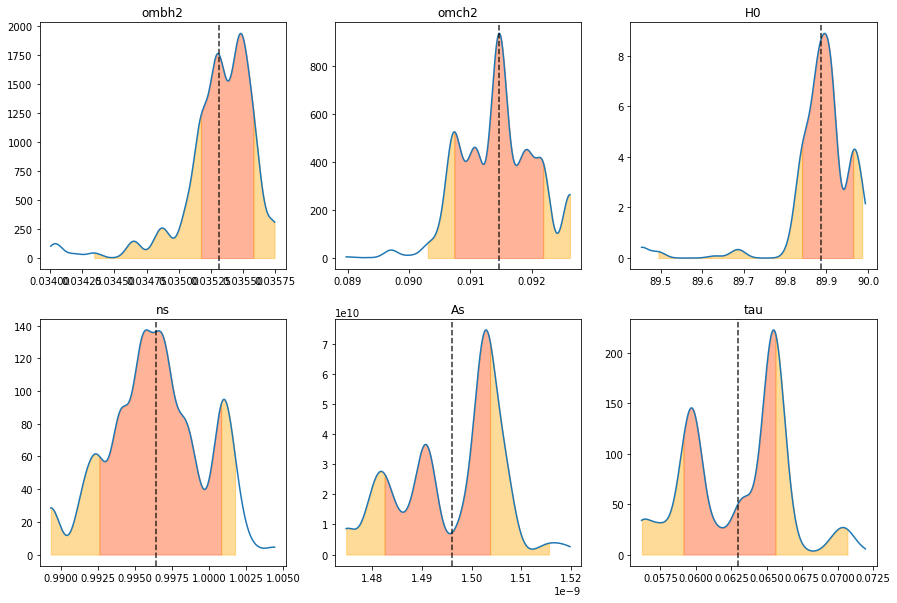

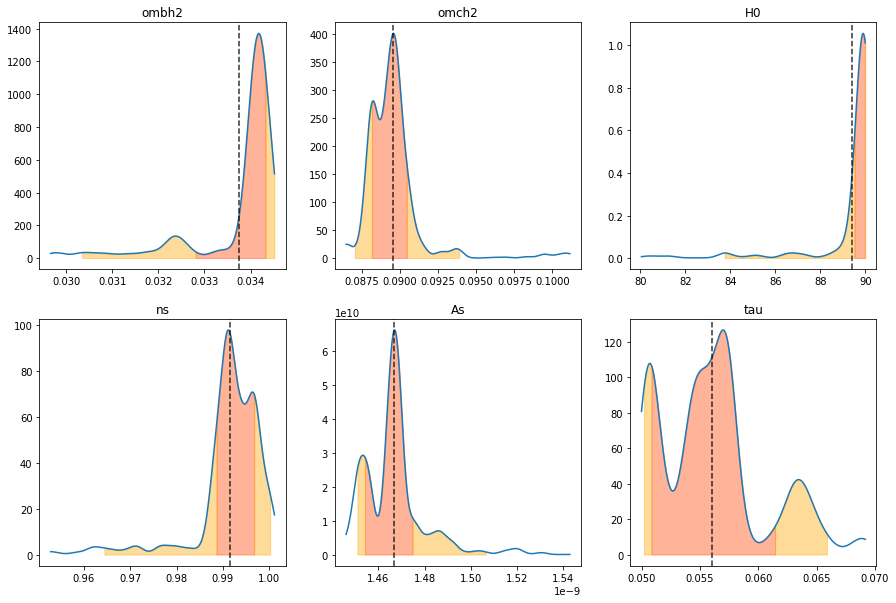

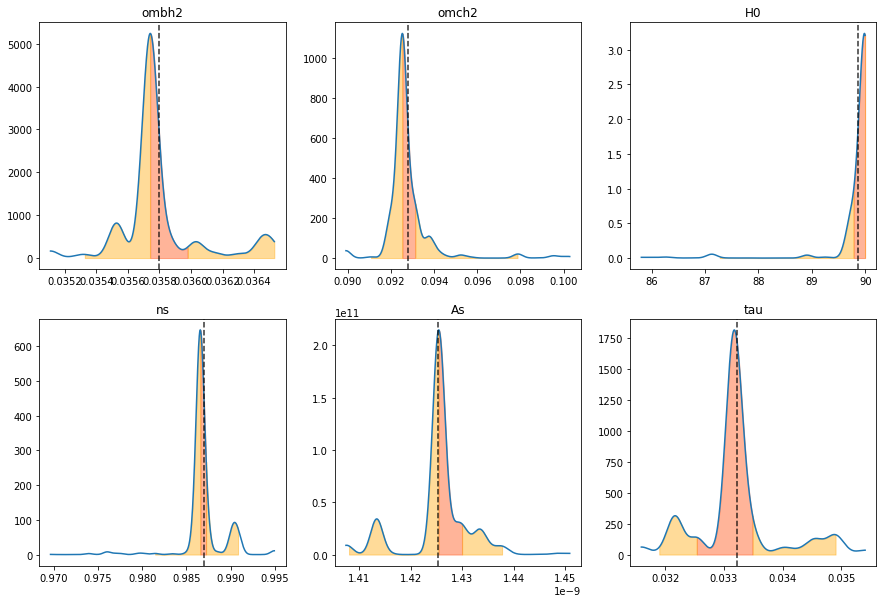

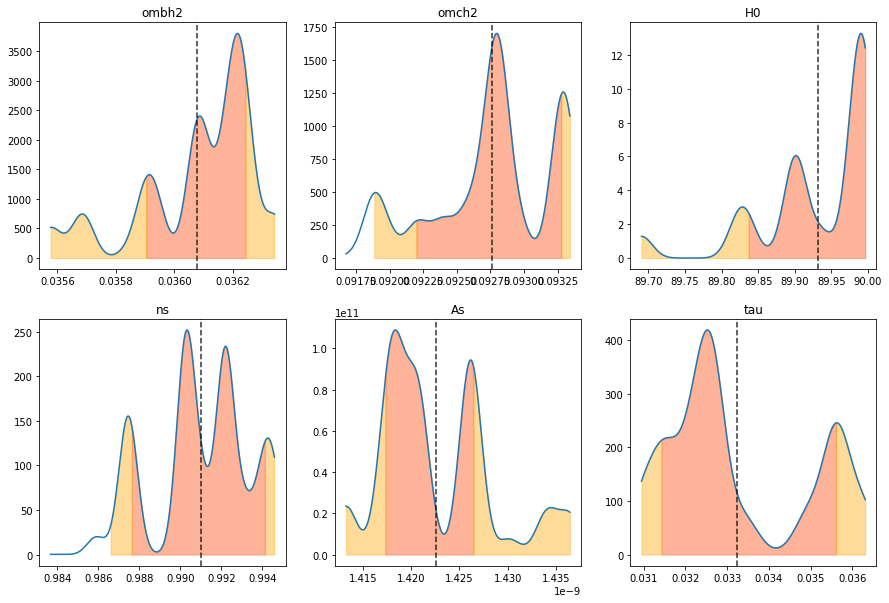

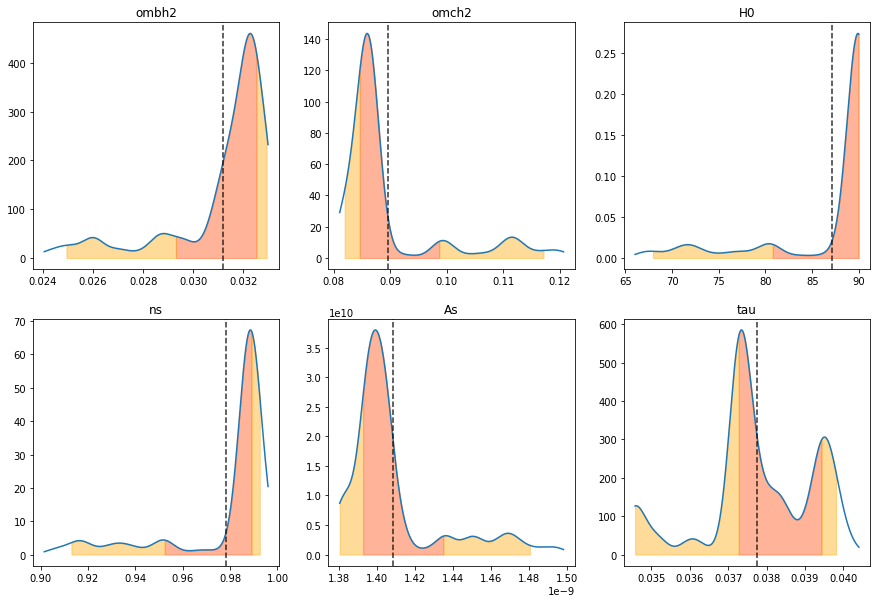

In [27]:
burnins = [850, 850, 850, 850, 850, 850]
from scipy.stats import gaussian_kde

for i in range(11):
    chain = np.load(f'planck_mcmc_chain_f{i+1}.npy')
    
    means = []
    CI68_lowers = []
    CI68_uppers = []
    CI95_lowers = []
    CI95_uppers = []
    
    for i in range(6):
        main_chain = chain[i][burnins[i]:]
        means.append(np.mean(main_chain))
        CI68_lowers.append(np.percentile(main_chain, 15.85))
        CI68_uppers.append(np.percentile(main_chain, 84.15))
        CI95_lowers.append(np.percentile(main_chain, 2.3))
        CI95_uppers.append(np.percentile(main_chain, 97.7))
    
    fig, ax = plt.subplots(2,3,figsize=(15,10))
    ind = 0
    param = chain[ind][burnins[ind]:]
    kde = gaussian_kde(param)
    x_vals = np.linspace(min(param), max(param), 1000)
    pdf_vals = kde(x_vals)
    ax[0,0].plot(x_vals, pdf_vals)
    ax[0,0].axvline(x=means[ind],color='k',ls='--', alpha=0.8)
    mask1 = (x_vals >= CI68_lowers[ind]) & (x_vals <= CI68_uppers[ind])
    mask2 = (x_vals >= CI95_lowers[ind]) & (x_vals <= CI68_lowers[ind])
    mask3 = (x_vals >= CI68_uppers[ind]) & (x_vals <= CI95_uppers[ind])
    ax[0,0].fill_between(x_vals[mask1], pdf_vals[mask1], alpha=0.4, color = 'orangered', label="68.3% interval")
    ax[0,0].fill_between(x_vals[mask2], pdf_vals[mask2], alpha=0.4, color = 'orange', label="95.4% interval")
    ax[0,0].fill_between(x_vals[mask3], pdf_vals[mask3], alpha=0.4, color = 'orange')
    ax[0,0].set_title('ombh2')

    ind = 1
    param = chain[ind][burnins[ind]:]
    kde = gaussian_kde(param)
    x_vals = np.linspace(min(param), max(param), 1000)
    pdf_vals = kde(x_vals)
    ax[0,1].plot(x_vals, pdf_vals)
    ax[0,1].axvline(x=means[ind],color='k',ls='--', alpha=0.8)
    mask1 = (x_vals >= CI68_lowers[ind]) & (x_vals <= CI68_uppers[ind])
    mask2 = (x_vals >= CI95_lowers[ind]) & (x_vals <= CI68_lowers[ind])
    mask3 = (x_vals >= CI68_uppers[ind]) & (x_vals <= CI95_uppers[ind])
    ax[0,1].fill_between(x_vals[mask1], pdf_vals[mask1], alpha=0.4, color = 'orangered', label="68.3% interval")
    ax[0,1].fill_between(x_vals[mask2], pdf_vals[mask2], alpha=0.4, color = 'orange', label="95.4% interval")
    ax[0,1].fill_between(x_vals[mask3], pdf_vals[mask3], alpha=0.4, color = 'orange')
    ax[0,1].set_title('omch2')

    ind = 2
    param = chain[ind][burnins[ind]:]
    kde = gaussian_kde(param)
    x_vals = np.linspace(min(param), max(param), 1000)
    pdf_vals = kde(x_vals)
    ax[0,2].plot(x_vals, pdf_vals)
    ax[0,2].axvline(x=means[ind],color='k',ls='--', alpha=0.8)
    mask1 = (x_vals >= CI68_lowers[ind]) & (x_vals <= CI68_uppers[ind])
    mask2 = (x_vals >= CI95_lowers[ind]) & (x_vals <= CI68_lowers[ind])
    mask3 = (x_vals >= CI68_uppers[ind]) & (x_vals <= CI95_uppers[ind])
    ax[0,2].fill_between(x_vals[mask1], pdf_vals[mask1], alpha=0.4, color = 'orangered', label="68.3% interval")
    ax[0,2].fill_between(x_vals[mask2], pdf_vals[mask2], alpha=0.4, color = 'orange', label="95.4% interval")
    ax[0,2].fill_between(x_vals[mask3], pdf_vals[mask3], alpha=0.4, color = 'orange')
    ax[0,2].set_title('H0')

    ind = 3
    param = chain[ind][burnins[ind]:]
    kde = gaussian_kde(param)
    x_vals = np.linspace(min(param), max(param), 1000)
    pdf_vals = kde(x_vals)
    ax[1,0].plot(x_vals, pdf_vals)
    ax[1,0].axvline(x=means[ind],color='k',ls='--', alpha=0.8)
    mask1 = (x_vals >= CI68_lowers[ind]) & (x_vals <= CI68_uppers[ind])
    mask2 = (x_vals >= CI95_lowers[ind]) & (x_vals <= CI68_lowers[ind])
    mask3 = (x_vals >= CI68_uppers[ind]) & (x_vals <= CI95_uppers[ind])
    ax[1,0].fill_between(x_vals[mask1], pdf_vals[mask1], alpha=0.4, color = 'orangered', label="68.3% interval")
    ax[1,0].fill_between(x_vals[mask2], pdf_vals[mask2], alpha=0.4, color = 'orange', label="95.4% interval")
    ax[1,0].fill_between(x_vals[mask3], pdf_vals[mask3], alpha=0.4, color = 'orange')
    ax[1,0].set_title('ns')

    ind = 4
    param = chain[ind][burnins[ind]:]
    kde = gaussian_kde(param)
    x_vals = np.linspace(min(param), max(param), 1000)
    pdf_vals = kde(x_vals)
    ax[1,1].plot(x_vals, pdf_vals)
    ax[1,1].axvline(x=means[ind],color='k',ls='--', alpha=0.8)
    mask1 = (x_vals >= CI68_lowers[ind]) & (x_vals <= CI68_uppers[ind])
    mask2 = (x_vals >= CI95_lowers[ind]) & (x_vals <= CI68_lowers[ind])
    mask3 = (x_vals >= CI68_uppers[ind]) & (x_vals <= CI95_uppers[ind])
    ax[1,1].fill_between(x_vals[mask1], pdf_vals[mask1], alpha=0.4, color = 'orangered', label="68.3% interval")
    ax[1,1].fill_between(x_vals[mask2], pdf_vals[mask2], alpha=0.4, color = 'orange', label="95.4% interval")
    ax[1,1].fill_between(x_vals[mask3], pdf_vals[mask3], alpha=0.4, color = 'orange')
    ax[1,1].set_title('As')

    ind = 5
    param = chain[ind][burnins[ind]:]
    kde = gaussian_kde(param)
    x_vals = np.linspace(min(param), max(param), 1000)
    pdf_vals = kde(x_vals)
    ax[1,2].plot(x_vals, pdf_vals)
    ax[1,2].axvline(x=means[ind],color='k',ls='--', alpha=0.8)
    mask1 = (x_vals >= CI68_lowers[ind]) & (x_vals <= CI68_uppers[ind])
    mask2 = (x_vals >= CI95_lowers[ind]) & (x_vals <= CI68_lowers[ind])
    mask3 = (x_vals >= CI68_uppers[ind]) & (x_vals <= CI95_uppers[ind])
    ax[1,2].fill_between(x_vals[mask1], pdf_vals[mask1], alpha=0.4, color = 'orangered', label="68.3% interval")
    ax[1,2].fill_between(x_vals[mask2], pdf_vals[mask2], alpha=0.4, color = 'orange', label="95.4% interval")
    ax[1,2].fill_between(x_vals[mask3], pdf_vals[mask3], alpha=0.4, color = 'orange')
    ax[1,2].set_title('tau')
    plt.show()

### Concatenating different chains

In [28]:
# I'm just going to use one burn-in value
# (originally was using 850, but I played around with it to remove burn-in from all chains)
burnin = 2000

#chains = [chain1[:,burnin:], chain2[:,burnin:], chain3[:,burnin:], chain4[:,burnin:], 
#          chain5[:,burnin:], chain6[:,burnin:], chain7[:,burnin:], chain8[:,burnin:], 
#          chain9[:,burnin:], chain10[:,burnin:], chain11[:,burnin:]]
chains = [chain1[:,burnin:], chain2[:,burnin:], chain4[:,burnin:], chain5[:,burnin:], chain6[:,burnin:], 
          chain9[:,burnin:], chain10[:,burnin:]]
#chains = [chain2[:,burnin:], chain3[:,burnin:], chain4[:,burnin:]]
tot_chain = np.concatenate(chains, axis=1)

In [29]:
#chains_stack = np.stack([chain1[:,burnin:], chain2[:,burnin:], chain3[:,burnin:], chain4[:,burnin:], 
#                         chain5[:,burnin:], chain6[:,burnin:], chain7[:,burnin:], chain8[:,burnin:],
#                         chain9[:,burnin:], chain10[:,burnin:], chain11[:,burnin:]], axis=0)
#chains_stack = np.stack([chain1[:,burnin:], chain2[:,burnin:], chain4[:,burnin:], 
#                         chain5[:,burnin:], chain6[:,burnin:],
#                         chain9[:,burnin:], chain10[:,burnin:]], axis=0)
chains_stack = np.stack([chain1, chain2, chain4, chain5, chain6, chain9, chain10], axis=0)
print(chains_stack.shape)
gelman_rubin(chains_stack)

(7, 6, 5000)


array([1.08684911, 1.05997006, 1.02763285, 1.04300851, 1.00957806,
       1.45356857])

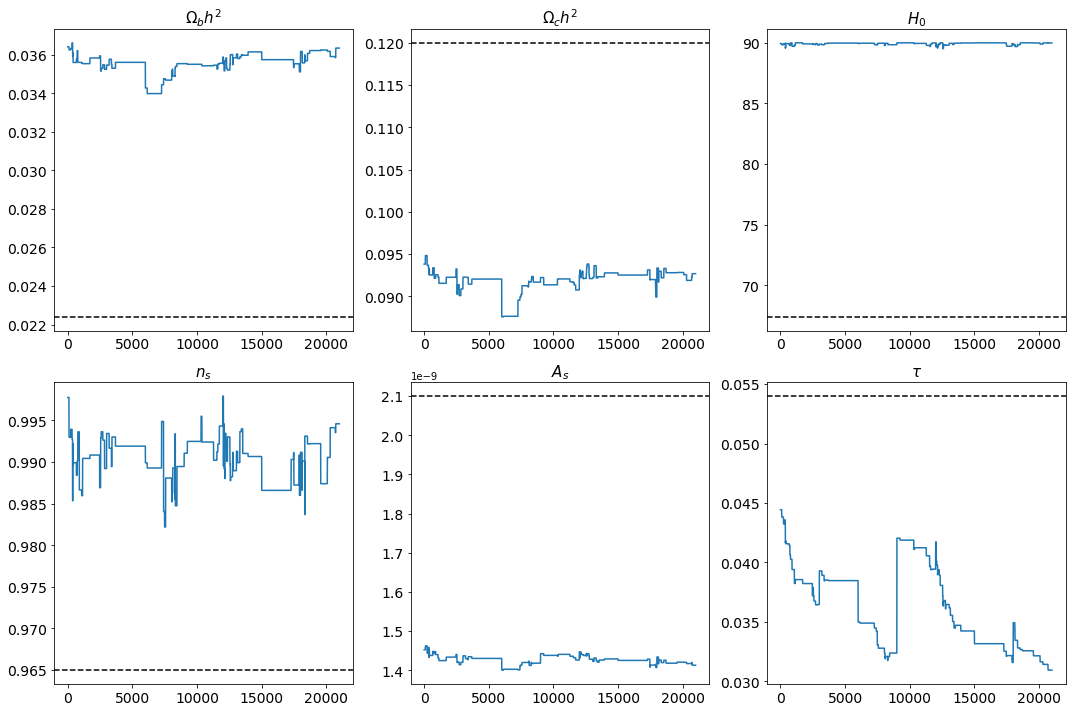

In [30]:
fig, ax = plt.subplots(2,3,figsize=(15,10))
ax[0,0].plot(np.arange(1,len(tot_chain[0])+1), tot_chain[0])
ax[0,0].axhline(y=0.0224, c='k', ls='--')
ax[0,0].set_title(r'$\Omega_bh^2$', fontsize=15)
ax[0,0].tick_params(labelsize=14)
ax[0,1].plot(np.arange(1,len(tot_chain[1])+1), tot_chain[1])
ax[0,1].axhline(y=0.12, c='k', ls='--')
ax[0,1].set_title(r'$\Omega_ch^2$', fontsize=15)
ax[0,1].tick_params(labelsize=14)
ax[0,2].plot(np.arange(1,len(tot_chain[2])+1), tot_chain[2])
ax[0,2].axhline(y=67.4, c='k', ls='--')
ax[0,2].set_title(r'$H_0$', fontsize=15)
ax[0,2].tick_params(labelsize=14)
ax[1,0].plot(np.arange(1,len(tot_chain[3])+1), tot_chain[3])
ax[1,0].axhline(y=0.965, c='k', ls='--')
ax[1,0].set_title(r'$n_s$', fontsize=15)
ax[1,0].tick_params(labelsize=14)
ax[1,1].plot(np.arange(1,len(tot_chain[4])+1), tot_chain[4])
ax[1,1].axhline(y=2.1e-9, c='k', ls='--')
ax[1,1].set_title(r'$A_s$', fontsize=15)
ax[1,1].tick_params(labelsize=14)
ax[1,2].plot(np.arange(1,len(tot_chain[5])+1), tot_chain[5])
ax[1,2].axhline(y=0.054, c='k', ls='--')
ax[1,2].set_title(r'$\tau$', fontsize=15)
ax[1,2].tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig('chains.pdf', dpi=300)
plt.show()

In [31]:
#burnins = [700, 850, 850, 850, 850, 850]
param_names = ['ombh2', 'omch2', 'H0', 'ns', 'As', 'tau']
fiducials = [0.0224, 0.120, 67.4, 0.965, 2.1e-9, 0.054] # from Planck 2018 results paper

means = []
CI68_lowers = []
CI68_uppers = []
CI95_lowers = []
CI95_uppers = []

for i in range(6):
    main_chain = tot_chain[i][burnin:]
    print(f'{param_names[i]} (fiducial: {fiducials[i]}):')
    print(f'mean: {np.mean(main_chain):.4}')
    means.append(np.mean(main_chain))
    print(f'median: {np.median(main_chain):.4}')
    print(f'St. Dev.: {np.std(main_chain):.4}')
    print(f'min, max: {np.min(main_chain):.4} – {np.max(main_chain):.4}')
    print(f'68.3% CI: {np.percentile(main_chain, 15.85):.4} – {np.percentile(main_chain, 84.15):.4}')
    CI68_lowers.append(np.percentile(main_chain, 15.85))
    CI68_uppers.append(np.percentile(main_chain, 84.15))
    print(f'95.4% CI: {np.percentile(main_chain, 2.3):.4} – {np.percentile(main_chain, 97.7):.4}')
    CI95_lowers.append(np.percentile(main_chain, 2.3))
    CI95_uppers.append(np.percentile(main_chain, 97.7))
    print()

ombh2 (fiducial: 0.0224):
mean: 0.03556
median: 0.0356
St. Dev.: 0.0005431
min, max: 0.03398 – 0.03634
68.3% CI: 0.03528 – 0.03614
95.4% CI: 0.03398 – 0.03624

omch2 (fiducial: 0.12):
mean: 0.09184
median: 0.09206
St. Dev.: 0.001305
min, max: 0.08757 – 0.09382
68.3% CI: 0.09136 – 0.09277
95.4% CI: 0.08764 – 0.09334

H0 (fiducial: 67.4):
mean: 89.94
median: 89.98
St. Dev.: 0.07686
min, max: 89.51 – 90.0
68.3% CI: 89.84 – 90.0
95.4% CI: 89.72 – 90.0

ns (fiducial: 0.965):
mean: 0.9905
median: 0.9908
St. Dev.: 0.002497
min, max: 0.9822 – 0.9979
68.3% CI: 0.9872 – 0.9925
95.4% CI: 0.9863 – 0.9946

As (fiducial: 2.1e-09):
mean: 1.426e-09
median: 1.426e-09
St. Dev.: 1.027e-11
min, max: 1.401e-09 – 1.447e-09
68.3% CI: 1.417e-09 – 1.437e-09
95.4% CI: 1.403e-09 – 1.442e-09

tau (fiducial: 0.054):
mean: 0.03582
median: 0.0349
St. Dev.: 0.003313
min, max: 0.03095 – 0.04204
68.3% CI: 0.03254 – 0.03944
95.4% CI: 0.03143 – 0.04188



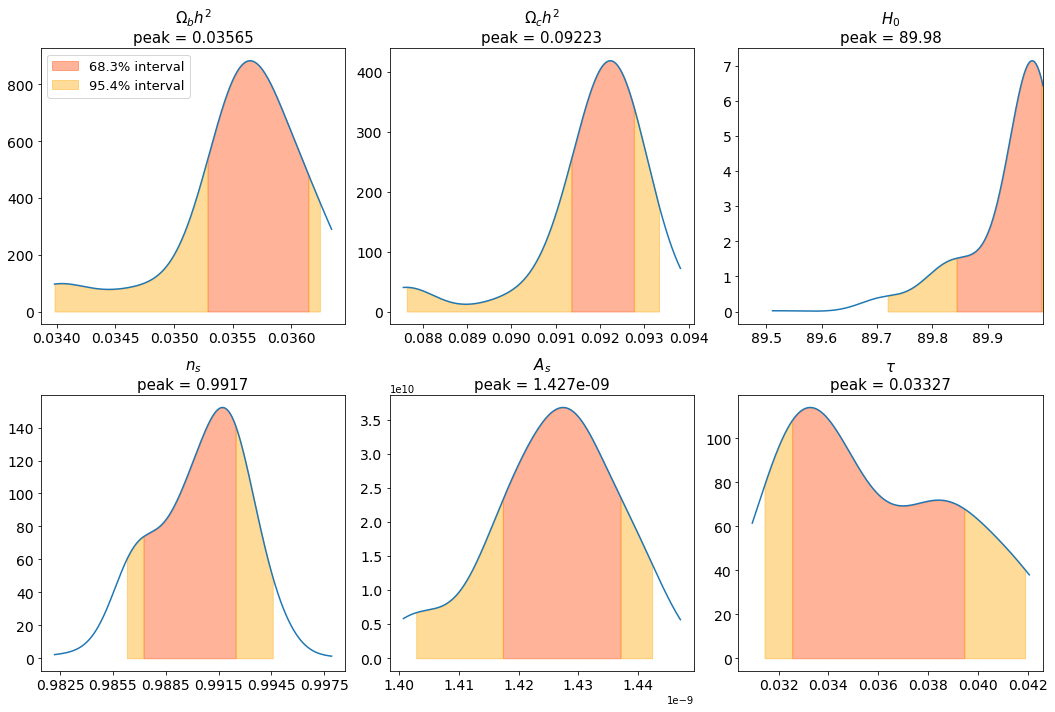

In [32]:
from scipy.stats import gaussian_kde
#bandwidth = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
bandwidth = [0.5]*6

fig, ax = plt.subplots(2,3,figsize=(15,10))
ind = 0
param = tot_chain[ind][burnin:]
kde = gaussian_kde(param, bw_method = bandwidth[ind])
x_vals = np.linspace(min(param), max(param), 1000)
pdf_vals = kde(x_vals)
x_peak = x_vals[np.argmax(pdf_vals)]
ax[0,0].plot(x_vals, pdf_vals)
#ax[0,0].axvline(x=means[ind],color='k',ls='--', alpha=0.8)
mask1 = (x_vals >= CI68_lowers[ind]) & (x_vals <= CI68_uppers[ind])
mask2 = (x_vals >= CI95_lowers[ind]) & (x_vals <= CI68_lowers[ind])
mask3 = (x_vals >= CI68_uppers[ind]) & (x_vals <= CI95_uppers[ind])
ax[0,0].fill_between(x_vals[mask1], pdf_vals[mask1], alpha=0.4, color = 'orangered', label="68.3% interval")
ax[0,0].fill_between(x_vals[mask2], pdf_vals[mask2], alpha=0.4, color = 'orange', label="95.4% interval")
ax[0,0].fill_between(x_vals[mask3], pdf_vals[mask3], alpha=0.4, color = 'orange')
ax[0,0].set_title(r'$\Omega_bh^2$'+f'\npeak = {x_peak:.4}', fontsize=15)
ax[0,0].tick_params(labelsize=14)
ax[0,0].legend(prop={'size':13})

ind = 1
param = tot_chain[ind][burnin:]
kde = gaussian_kde(param, bw_method = bandwidth[ind])
x_vals = np.linspace(min(param), max(param), 1000)
pdf_vals = kde(x_vals)
x_peak = x_vals[np.argmax(pdf_vals)]
ax[0,1].plot(x_vals, pdf_vals)
#ax[0,1].axvline(x=means[ind],color='k',ls='--', alpha=0.8)
mask1 = (x_vals >= CI68_lowers[ind]) & (x_vals <= CI68_uppers[ind])
mask2 = (x_vals >= CI95_lowers[ind]) & (x_vals <= CI68_lowers[ind])
mask3 = (x_vals >= CI68_uppers[ind]) & (x_vals <= CI95_uppers[ind])
ax[0,1].fill_between(x_vals[mask1], pdf_vals[mask1], alpha=0.4, color = 'orangered', label="68.3% interval")
ax[0,1].fill_between(x_vals[mask2], pdf_vals[mask2], alpha=0.4, color = 'orange', label="95.4% interval")
ax[0,1].fill_between(x_vals[mask3], pdf_vals[mask3], alpha=0.4, color = 'orange')
ax[0,1].set_title(r'$\Omega_ch^2$'+f'\npeak = {x_peak:.4}', fontsize=15)
ax[0,1].tick_params(labelsize=14)

ind = 2
param = tot_chain[ind][burnin:]
kde = gaussian_kde(param, bw_method = bandwidth[ind])
x_vals = np.linspace(min(param), max(param), 1000)
pdf_vals = kde(x_vals)
x_peak = x_vals[np.argmax(pdf_vals)]
ax[0,2].plot(x_vals, pdf_vals)
#ax[0,2].axvline(x=means[ind],color='k',ls='--', alpha=0.8)
mask1 = (x_vals >= CI68_lowers[ind]) & (x_vals <= CI68_uppers[ind])
mask2 = (x_vals >= CI95_lowers[ind]) & (x_vals <= CI68_lowers[ind])
mask3 = (x_vals >= CI68_uppers[ind]) & (x_vals <= CI95_uppers[ind])
ax[0,2].fill_between(x_vals[mask1], pdf_vals[mask1], alpha=0.4, color = 'orangered', label="68.3% interval")
ax[0,2].fill_between(x_vals[mask2], pdf_vals[mask2], alpha=0.4, color = 'orange', label="95.4% interval")
ax[0,2].fill_between(x_vals[mask3], pdf_vals[mask3], alpha=0.4, color = 'orange')
ax[0,2].set_xlim(89.45, np.max(x_vals))
ax[0,2].set_title(r'$H_0$'+f'\npeak = {x_peak:.4}', fontsize=15)
ax[0,2].tick_params(labelsize=14)

ind = 3
param = tot_chain[ind][burnin:]
kde = gaussian_kde(param, bw_method = bandwidth[ind])
x_vals = np.linspace(min(param), max(param), 1000)
pdf_vals = kde(x_vals)
x_peak = x_vals[np.argmax(pdf_vals)]
ax[1,0].plot(x_vals, pdf_vals)
#ax[1,0].axvline(x=means[ind],color='k',ls='--', alpha=0.8)
mask1 = (x_vals >= CI68_lowers[ind]) & (x_vals <= CI68_uppers[ind])
mask2 = (x_vals >= CI95_lowers[ind]) & (x_vals <= CI68_lowers[ind])
mask3 = (x_vals >= CI68_uppers[ind]) & (x_vals <= CI95_uppers[ind])
ax[1,0].fill_between(x_vals[mask1], pdf_vals[mask1], alpha=0.4, color = 'orangered', label="68.3% interval")
ax[1,0].fill_between(x_vals[mask2], pdf_vals[mask2], alpha=0.4, color = 'orange', label="95.4% interval")
ax[1,0].fill_between(x_vals[mask3], pdf_vals[mask3], alpha=0.4, color = 'orange')
ax[1,0].set_title(r'$n_s$'+f'\npeak = {x_peak:.4}', fontsize=15)
xticks = np.arange(0.9825, 0.9975, 0.003)
ax[1,0].set_xticks(xticks)
ax[1,0].tick_params(labelsize=14)

ind = 4
param = tot_chain[ind][burnin:]
kde = gaussian_kde(param, bw_method = bandwidth[ind])
x_vals = np.linspace(min(param), max(param), 1000)
pdf_vals = kde(x_vals)
x_peak = x_vals[np.argmax(pdf_vals)]
ax[1,1].plot(x_vals, pdf_vals)
#ax[1,1].axvline(x=means[ind],color='k',ls='--', alpha=0.8)
mask1 = (x_vals >= CI68_lowers[ind]) & (x_vals <= CI68_uppers[ind])
mask2 = (x_vals >= CI95_lowers[ind]) & (x_vals <= CI68_lowers[ind])
mask3 = (x_vals >= CI68_uppers[ind]) & (x_vals <= CI95_uppers[ind])
ax[1,1].fill_between(x_vals[mask1], pdf_vals[mask1], alpha=0.4, color = 'orangered', label="68.3% interval")
ax[1,1].fill_between(x_vals[mask2], pdf_vals[mask2], alpha=0.4, color = 'orange', label="95.4% interval")
ax[1,1].fill_between(x_vals[mask3], pdf_vals[mask3], alpha=0.4, color = 'orange')
ax[1,1].set_title(r'$A_s$'+f'\npeak = {x_peak:.4}', fontsize=15)
ax[1,1].tick_params(labelsize=14)

ind = 5
param = tot_chain[ind][burnin:]
kde = gaussian_kde(param, bw_method = bandwidth[ind])
x_vals = np.linspace(min(param), max(param), 1000)
pdf_vals = kde(x_vals)
x_peak = x_vals[np.argmax(pdf_vals)]
ax[1,2].plot(x_vals, pdf_vals)
#ax[1,2].axvline(x=means[ind],color='k',ls='--', alpha=0.8)
mask1 = (x_vals >= CI68_lowers[ind]) & (x_vals <= CI68_uppers[ind])
mask2 = (x_vals >= CI95_lowers[ind]) & (x_vals <= CI68_lowers[ind])
mask3 = (x_vals >= CI68_uppers[ind]) & (x_vals <= CI95_uppers[ind])
ax[1,2].fill_between(x_vals[mask1], pdf_vals[mask1], alpha=0.4, color = 'orangered', label="68.3% interval")
ax[1,2].fill_between(x_vals[mask2], pdf_vals[mask2], alpha=0.4, color = 'orange', label="95.4% interval")
ax[1,2].fill_between(x_vals[mask3], pdf_vals[mask3], alpha=0.4, color = 'orange')
ax[1,2].set_title(r'$\tau$'+f'\npeak = {x_peak:.4}', fontsize=15)
ax[1,2].tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig('mcmc_pdfs.pdf', dpi=300)
plt.show()

In [28]:
# testing python script
#!python3 planck_mcmc.py 0.0224 0.12 67.4 0.965 0.0000000021 0.054 50 0.000224 0.0012 0.674 0.00965 0.000000000021 0.00054 test

"""
chain = np.load('planck_mcmc_chaintest.npy')

fig, ax = plt.subplots(2,3,figsize=(15,10))
ax[0,0].plot(np.arange(1,len(chain[0])+1), chain[0])
ax[0,0].axhline(y=0.0224, c='k', ls='--')
ax[0,0].set_title('ombh2')
ax[0,1].plot(np.arange(1,len(chain[1])+1), chain[1])
ax[0,1].axhline(y=0.12, c='k', ls='--')
ax[0,1].set_title('omch2')
ax[0,2].plot(np.arange(1,len(chain[2])+1), chain[2])
ax[0,2].axhline(y=67.4, c='k', ls='--')
ax[0,2].set_title('H0')
ax[1,0].plot(np.arange(1,len(chain[3])+1), chain[3])
ax[1,0].axhline(y=0.965, c='k', ls='--')
ax[1,0].set_title('ns')
ax[1,1].plot(np.arange(1,len(chain[4])+1), chain[4])
ax[1,1].axhline(y=2.1e-9, c='k', ls='--')
ax[1,1].set_title('As')
ax[1,2].plot(np.arange(1,len(chain[5])+1), chain[5])
ax[1,2].axhline(y=0.054, c='k', ls='--')
ax[1,2].set_title('tau')
plt.show()
"""

"\nchain = np.load('planck_mcmc_chaintest.npy')\n\nfig, ax = plt.subplots(2,3,figsize=(15,10))\nax[0,0].plot(np.arange(1,len(chain[0])+1), chain[0])\nax[0,0].axhline(y=0.0224, c='k', ls='--')\nax[0,0].set_title('ombh2')\nax[0,1].plot(np.arange(1,len(chain[1])+1), chain[1])\nax[0,1].axhline(y=0.12, c='k', ls='--')\nax[0,1].set_title('omch2')\nax[0,2].plot(np.arange(1,len(chain[2])+1), chain[2])\nax[0,2].axhline(y=67.4, c='k', ls='--')\nax[0,2].set_title('H0')\nax[1,0].plot(np.arange(1,len(chain[3])+1), chain[3])\nax[1,0].axhline(y=0.965, c='k', ls='--')\nax[1,0].set_title('ns')\nax[1,1].plot(np.arange(1,len(chain[4])+1), chain[4])\nax[1,1].axhline(y=2.1e-9, c='k', ls='--')\nax[1,1].set_title('As')\nax[1,2].plot(np.arange(1,len(chain[5])+1), chain[5])\nax[1,2].axhline(y=0.054, c='k', ls='--')\nax[1,2].set_title('tau')\nplt.show()\n"

In [7]:
#ombh2 = 0.0224; omch2 = 0.12; H0 = 67.4
#ns = 0.965; As = 2.1e-9; tau = 0.054
# Play around with these bounds
#if not (0.01 < ombh2 < 0.04): return -np.inf
#if not (0.05 < omch2 < 0.2): return -np.inf
#if not (50 < H0 < 90): return -np.inf
#if not (0.9 < ns < 1.1): return -np.inf
#if not (1e-9 < As < 3e-9): return -np.inf
#if not (0.01 < tau < 0.15): return -np.inf

for i in range(10):
    print(f'{np.random.uniform(0.013, 0.037):.4} {np.random.uniform(0.07, 0.18):.4} {np.random.uniform(55, 85):.4} {np.random.uniform(0.93, 1.07):.4} {np.random.uniform(1.3, 2.7):.4} {np.random.uniform(0.02, 0.1):.4}')
    

0.03476 0.07941 80.45 1.011 1.954 0.04038
0.01879 0.07379 82.08 1.049 1.697 0.02383
0.02169 0.0914 82.95 0.9658 2.557 0.03536
0.02552 0.1117 58.46 0.9473 1.624 0.04251
0.0333 0.07539 68.05 1.059 1.313 0.05608
0.02174 0.1346 71.72 1.026 2.458 0.08613
0.01352 0.1124 68.26 0.9947 2.384 0.06363
0.03307 0.1396 55.42 1.015 2.093 0.03934
0.0307 0.1742 67.45 1.044 2.409 0.04329
0.01425 0.1246 75.99 1.062 2.304 0.0344


### Extra stuff

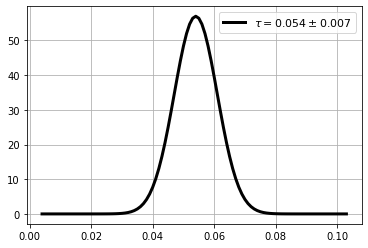

In [29]:
sigma = 0.007
mu = 0.054
xs = np.arange(-.05+mu,.05+mu,0.001)
plt
plt.plot(xs, 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1*(xs-mu)**2/(2*sigma**2)), c='k',lw=3, label=r'$\tau=0.054\pm0.007$')
#plt.xticks([mu-sigma, mu, mu+sigma])
plt.grid()
plt.legend(prop={'size':11})

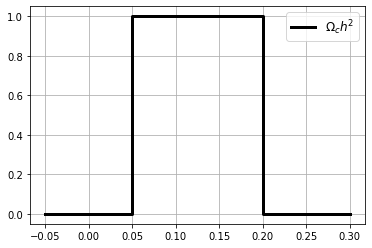

In [31]:
"""
if not (0.01 < ombh2 < 0.04): return -np.inf
if not (0.05 < omch2 < 0.2): return -np.inf
if not (50 < H0 < 90): return -np.inf
if not (0.01 < tau < 0.15): return -np.inf
if not (0.9 < ns < 1.1): return -np.inf
if not (1e-9 < As < 3e-9): return -np.inf
"""

ys = [0,0,1,1,0,0]
xs = [-0.05, 0.05, 0.05, 0.2, 0.2, 0.3]
plt.plot(xs, ys, c='k',lw=3, label=r'$\Omega_ch^2$')
#plt.xticks([mu-sigma, mu, mu+sigma])
plt.grid()
plt.legend(prop={'size':12})